# TikTok Data Analysis
Using linear regression, this project aims to investigate whether or not there is a relationship between the length of a TikTok video and its popularity.

In this project I have used a dataset from Kaggle: 
* [Kaggle Dataset](https://www.kaggle.com/datasets/muhammadanasmahmood/tiktok-dataset/code)

## Questions
1. What is the best measure of popularity?  
    * Comment count?
    * Play count?
    * Share count?
2. Does Duration effect popularity?

## Notebook Content

1. **Step 1:** Install + Import Necessary Libraries
2. **Step 2:** Reading + Exploring Data
3. **Step 3:** Cleaning Data + Preprocessing
4. **Step 4:** Data Anaylis + Visualization
5. **TikTok Data Analysis Results**

## Step 1: Install + Import Necessary Libraries

In [1]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install scipy 
# !pip install statmodels

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

## Step 2: Reading + Exploring Data

In [3]:
df1 = pd.read_csv("free_tiktok_scraper_dataset.csv")
df1.head()

,authorMeta/avatar,authorMeta/digg,authorMeta/fans,authorMeta/following,authorMeta/heart,authorMeta/id,authorMeta/name,authorMeta/nickName,authorMeta/signature,authorMeta/verified,...,musicMeta/playUrl,playCount,searchHashtag/name,searchHashtag/views,shareCount,text,videoMeta/duration,videoMeta/height,videoMeta/width,webVideoUrl
0,https://p16-sign-sg.tiktokcdn.com/aweme/720x72...,420,13200000,28,150400000,6713126981665686530,miso_ara,미소아라 Miso_Ara,soonent@soon-ent.co.kr\n.\n Miso Ara IG,True,...,https://sf16-ies-music-sg.tiktokcdn.com/obj/ti...,200600000,meme,556B,377700,Ara Woah #woah #woahchallenge #foryou #fyp...,17,1280,720,https://www.tiktok.com/@miso_ara/video/6797294...
1,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,10800,1300000,182,35100000,6929583089811522566,crinka11,Chris Rinker,insta: chrisrinker73,False,...,https://sf16-ies-music-va.tiktokcdn.com/obj/mu...,79600000,meme,556B,205400,#fyp #meme #funny #meme #vine,11,1024,576,https://www.tiktok.com/@crinka11/video/6958603...
2,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,251,696800,42,15900000,7083448802635596842,iampets_com,IamPéts,"Pet supplies, toys online store. All products ...",False,...,https://sf16-ies-music-va.tiktokcdn.com/obj/ie...,106100000,meme,556B,323000,The end #funny #funnyvideos #animals #haha #me...,25,1024,576,https://www.tiktok.com/@iampets_com/video/7083...
3,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,218,510200,56,32100000,7087287470497645573,dailydosevideos_,dailydosevideos,Daily dose of videos/memes \nsupport the page ...,False,...,https://sf16-ies-music-va.tiktokcdn.com/obj/mu...,72500000,meme,556B,133400,Try not to laugh hard #meme #trynottolaughtik...,62,1024,576,https://www.tiktok.com/@dailydosevideos_/video...
4,https://p19-sign.tiktokcdn-us.com/tos-useast5-...,47600,3300000,690,137300000,6621521206107717638,jakeypoov,Jake Sherman,-.-- --- ..- .-. . .-.. --- ...- . -.. ...,True,...,https://sf16-ies-music-va.tiktokcdn.com/obj/mu...,62700000,meme,556B,252900,HE DIDN’T HAVE HIS MASK ON @abbysherm (Follow...,36,1024,576,https://www.tiktok.com/@jakeypoov/video/681538...


In [4]:
df1.info

<bound method DataFrame.info of                                       authorMeta/avatar  authorMeta/digg  \
0     https://p16-sign-sg.tiktokcdn.com/aweme/720x72...              420   
1     https://p16-sign-va.tiktokcdn.com/tos-maliva-a...            10800   
2     https://p16-sign-va.tiktokcdn.com/tos-maliva-a...              251   
3     https://p16-sign-va.tiktokcdn.com/tos-maliva-a...              218   
4     https://p19-sign.tiktokcdn-us.com/tos-useast5-...            47600   
...                                                 ...              ...   
1195  https://p16-sign-va.tiktokcdn.com/musically-ma...               38   
1196  https://p16-sign-sg.tiktokcdn.com/aweme/720x72...            12900   
1197  https://p16-sign-va.tiktokcdn.com/tos-maliva-a...           195200   
1198  https://p16-sign-sg.tiktokcdn.com/aweme/720x72...            12900   
1199  https://p16-sign-va.tiktokcdn.com/musically-ma...            27900   

      authorMeta/fans  authorMeta/following  authorMeta

## Step 3: Cleaning + Preprocessing

In [5]:
df1.columns

Index(['authorMeta/avatar', 'authorMeta/digg', 'authorMeta/fans',
       'authorMeta/following', 'authorMeta/heart', 'authorMeta/id',
       'authorMeta/name', 'authorMeta/nickName', 'authorMeta/signature',
       'authorMeta/verified', 'authorMeta/video', 'commentCount', 'createTime',
       'createTimeISO', 'diggCount', 'downloaded', 'effectStickers/0/ID',
       'effectStickers/0/name', 'effectStickers/0/stickerStats/useCount',
       'effectStickers/1/ID', 'effectStickers/1/name',
       'effectStickers/1/stickerStats/useCount', 'hashtags/0/cover',
       'hashtags/0/id', 'hashtags/0/name', 'hashtags/0/title',
       'hashtags/1/cover', 'hashtags/1/id', 'hashtags/1/name',
       'hashtags/1/title', 'id', 'mediaUrls/0', 'mentions/0', 'mentions/1',
       'mentions/2', 'mentions/3', 'mentions/4', 'mentions/5',
       'musicMeta/musicAlbum', 'musicMeta/musicAuthor', 'musicMeta/musicName',
       'musicMeta/musicOriginal', 'musicMeta/playUrl', 'playCount',
       'searchHashtag/name', 

### Step 3.1: Selecting columns of interest
For this project we will only focus on authorMeta/nickName", "authorMeta/verified", "commentCount", "playCount", "shareCount", and "videoMeta/duration" as the rest are unecessary details.

In [6]:
tiktok_data = df1[["authorMeta/nickName", "authorMeta/verified",
                    "commentCount", "playCount", "shareCount",
                    "videoMeta/duration"]]

tiktok_data.columns = ["Nickname", "Verified", "CommentCount",
                       "PlayCount", "ShareCount", "Duration"]

tiktok_data.columns

Index(['Nickname', 'Verified', 'CommentCount', 'PlayCount', 'ShareCount',
       'Duration'],
      dtype='object')

In [7]:
tiktok_data.info

<bound method DataFrame.info of                 Nickname  Verified  CommentCount  PlayCount  ShareCount  \
0          미소아라 Miso_Ara      True         66000  200600000      377700   
1           Chris Rinker     False        154100   79600000      205400   
2                IamPéts     False         55300  106100000      323000   
3        dailydosevideos     False         70600   72500000      133400   
4           Jake Sherman      True         35500   62700000      252900   
...                  ...       ...           ...        ...         ...   
1195  dance tutorials ✌️     False          5400   16700000      198000   
1196         Beauty khan      True         12200   35600000       17200   
1197               jules     False          7317    8600000       53000   
1198         Beauty khan      True         17100   27400000       10400   
1199    John Di Domenico      True         32600   28500000       48500   

      Duration  
0           17  
1           11  
2           25  

### Step 3.2: Checking for null values ###

In [8]:
pd.DataFrame(tiktok_data.isnull().sum(), columns=['Missing Values']).rename_axis('Feature')

,Missing Values
Feature,
Nickname,22
Verified,0
CommentCount,0
PlayCount,0
ShareCount,0
Duration,0


The null values are not in the response or predictor variables and therefore there will be no impact on analysis/modeling. We can leave it as is.

## Step 4: Data Analysis + Visualization ##
In order to compare measures of popularity we will use linear regression.
### Question 1: What is the best measure of popularity ###

In [9]:
CommentShare = sm.OLS.from_formula('CommentCount ~ ShareCount + PlayCount', data=tiktok_data).fit()
print(CommentShare.summary())

p_values = CommentShare.pvalues
print("\nP-values for each coefficient:")
print(p_values)

                            OLS Regression Results                            
Dep. Variable:           CommentCount   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     568.6
Date:                Thu, 07 Dec 2023   Prob (F-statistic):          2.54e-174
Time:                        02:57:39   Log-Likelihood:                -14758.
No. Observations:                1200   AIC:                         2.952e+04
Df Residuals:                    1197   BIC:                         2.954e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9963.3506   2119.130      4.702      0.0

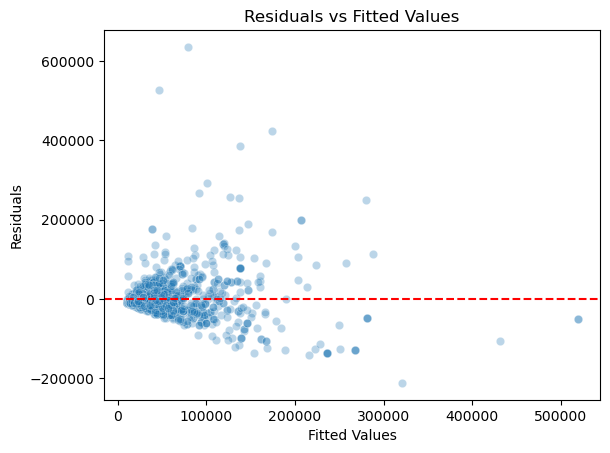

In [10]:
# Residual plot
residuals = CommentShare.resid
fitted_values = CommentShare.fittedvalues

# Scatter plot of residuals against fitted values
sns.scatterplot(x=fitted_values, y=residuals, alpha=0.3)
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

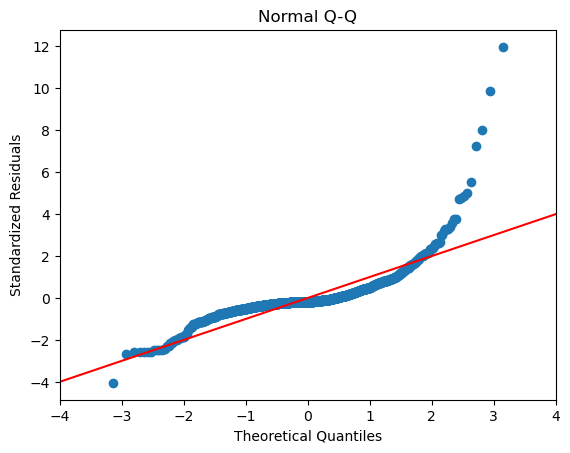

In [11]:
# Standardized residuals
standardized_residuals = CommentShare.get_influence().resid_studentized_internal

# QQ plot of standardized residuals
sm.qqplot(standardized_residuals, line='45', fit=True)
plt.title('Normal Q-Q')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')
plt.xlim(-4, 4)
plt.show()

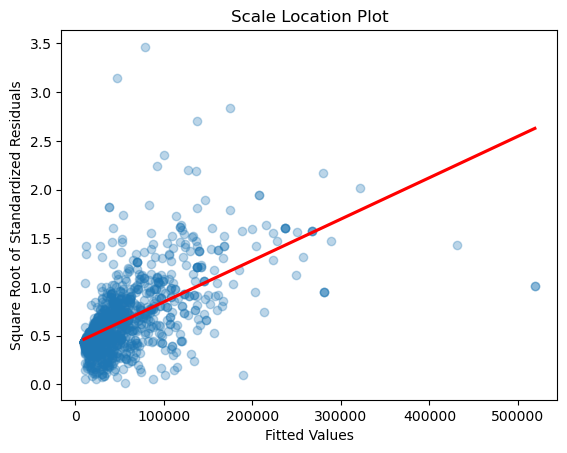

In [12]:
# Square root of absolute values of standardized residuals
sqrt_residuals = abs(standardized_residuals)**0.5

# Scale-location plot
plt.scatter(CommentShare.fittedvalues, sqrt_residuals, alpha=0.3)
sns.regplot(x=CommentShare.fittedvalues, y=sqrt_residuals, scatter=False, ci=None, line_kws={'color': 'red'})
plt.title('Scale Location Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Square Root of Standardized Residuals')
plt.show()

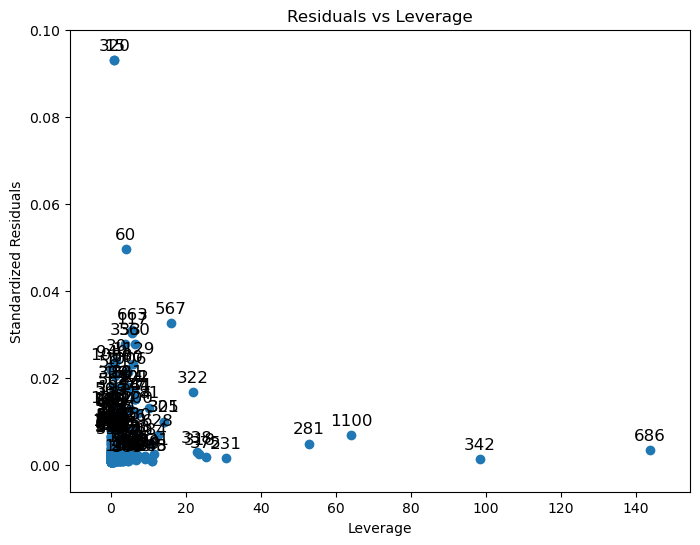

In [13]:
# Residuals vs Leverage plot
fig, ax = plt.subplots(figsize=(8, 6))
sm.graphics.plot_leverage_resid2(CommentShare, ax=ax)
plt.title('Residuals vs Leverage')
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals')
plt.show()

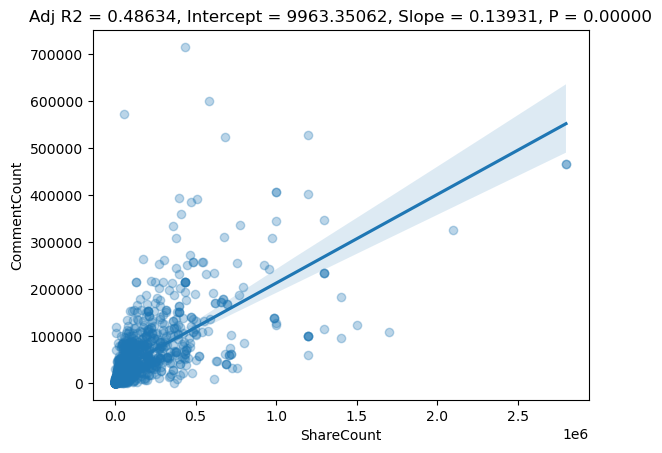

In [14]:
# Plotting the regression
sns.regplot(x='ShareCount', y='CommentCount', data=tiktok_data, scatter_kws={'alpha': 0.3})
plt.title(f'Adj R2 = {CommentShare.rsquared_adj:.5f}, Intercept = {CommentShare.params[0]:.5f}, Slope = {CommentShare.params[1]:.5f}, P = {CommentShare.pvalues[1]:.5f}')
plt.show()

It could be better, but since there is such a small coefficient for each and a significant P-value, I will use comments to measure popularity. Comments imply more engagement, leading me to select it as the primary measure.

### Question 2: Does Duration effect popularity?

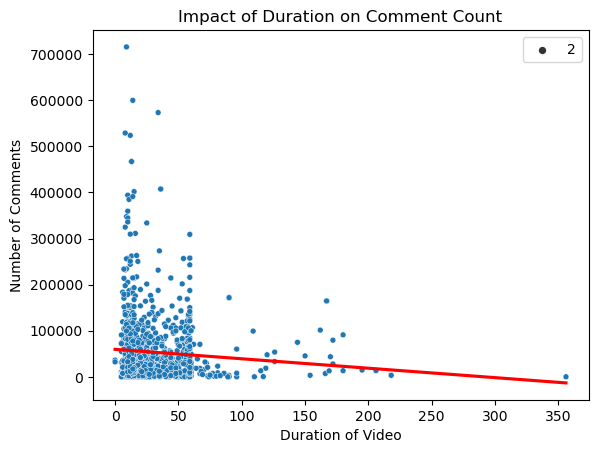

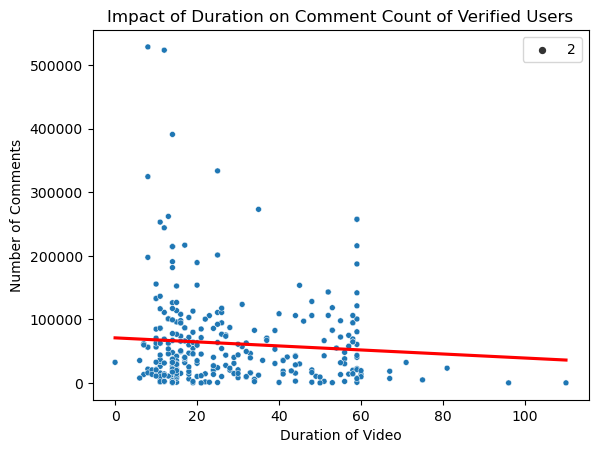

In [15]:
sns.scatterplot(x='Duration', y='CommentCount', data=tiktok_data, size=2, marker='o')
sns.regplot(x='Duration', y='CommentCount', data=tiktok_data, scatter=False, ci=None, line_kws={'color': 'red'})
plt.xlabel('Duration of Video')
plt.ylabel('Number of Comments')
plt.title('Impact of Duration on Comment Count')
plt.show()

# Filter for Verified users
tiktok_data_verified = tiktok_data[tiktok_data['Verified'] == True]

# Scatterplot and linear regression for Verified users
sns.scatterplot(x='Duration', y='CommentCount', data=tiktok_data_verified, size=2, marker='o')
sns.regplot(x='Duration', y='CommentCount', data=tiktok_data_verified, scatter=False, ci=None, line_kws={'color': 'red'})
plt.xlabel('Duration of Video')
plt.ylabel('Number of Comments')
plt.title('Impact of Duration on Comment Count of Verified Users')
plt.show()

This prevents issues around zero and filters out several outliers. Lets take a closer look at the model.

In [16]:
X = tiktok_data_verified[['Duration']]
y = tiktok_data_verified['CommentCount']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print("Summary of Linear Regression (CommentCount ~ Duration) for Verified Users:")
print(model.summary())

# Access the model parameters
print("\nCoefficients:")
print(model.params)

p_value_duration = model.pvalues['Duration']
print("\nP-value for 'Duration':",p_value_duration)

Summary of Linear Regression (CommentCount ~ Duration) for Verified Users:
                            OLS Regression Results                            
Dep. Variable:           CommentCount   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.129
Date:                Thu, 07 Dec 2023   Prob (F-statistic):              0.145
Time:                        02:57:40   Log-Likelihood:                -4120.8
No. Observations:                 327   AIC:                             8246.
Df Residuals:                     325   BIC:                             8253.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

This information shows no significant linear relationship between Duration and Comment Count. Does this hold for all users?

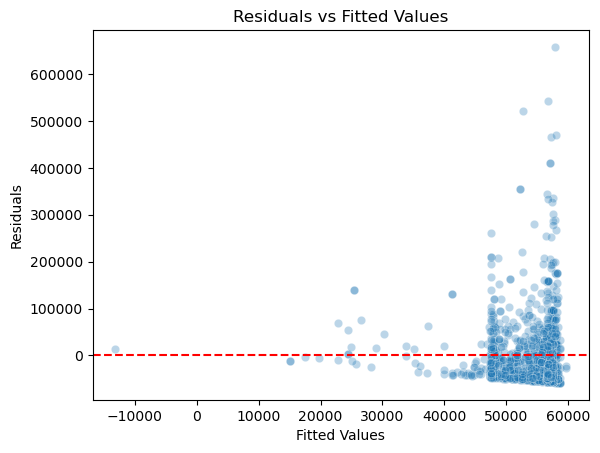

In [17]:
# Linear regression for all data
X_all = tiktok_data[['Duration']]
y_all = tiktok_data['CommentCount']
X_all = sm.add_constant(X_all)
model_all = sm.OLS(y_all, X_all).fit()

# Display regression summary
summary_all = model_all.summary()
# Calculate residuals
residuals_all = model_all.resid

# Residuals vs Fitted Values plot
sns.scatterplot(x=model_all.fittedvalues, y=residuals_all, alpha=0.3)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

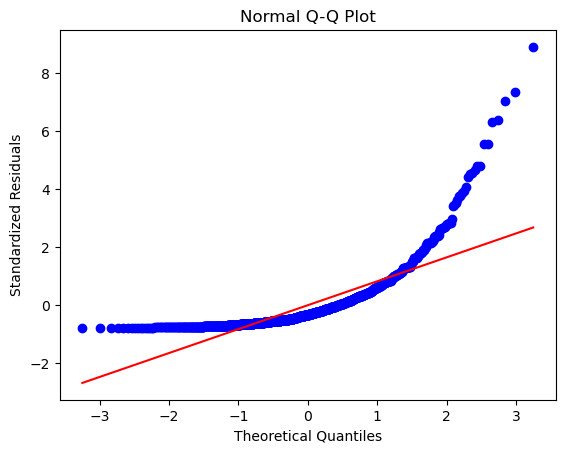

In [18]:
# Calculate standardized residuals
standardized_residuals_all = model_all.get_influence().resid_studentized_internal

# Normal Q-Q plot
stats.probplot(standardized_residuals_all, dist="norm", plot=plt)
plt.title('Normal Q-Q Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')
plt.show()

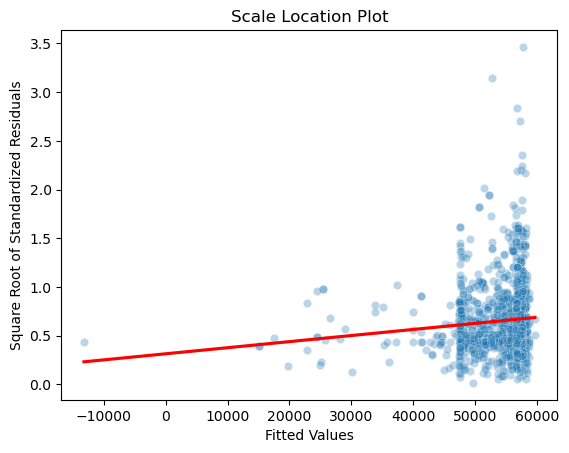

In [19]:
sns.scatterplot(x=model_all.fittedvalues, y=sqrt_residuals, alpha=0.3)
sns.regplot(x=model_all.fittedvalues, y=sqrt_residuals, scatter=False, ci=None, line_kws={'color': 'red'})
plt.title('Scale Location Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Square Root of Standardized Residuals')
plt.show()

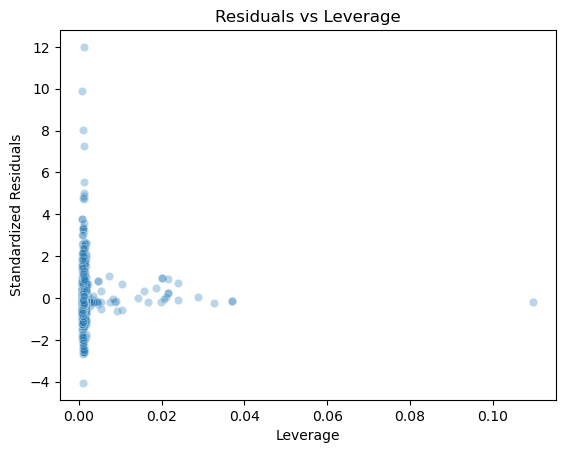

In [20]:
leverage_all = model_all.get_influence().hat_matrix_diag

# Residuals vs Leverage plot
sns.scatterplot(x=leverage_all, y=standardized_residuals, alpha=0.3)
plt.title('Residuals vs Leverage')
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals')
plt.show()

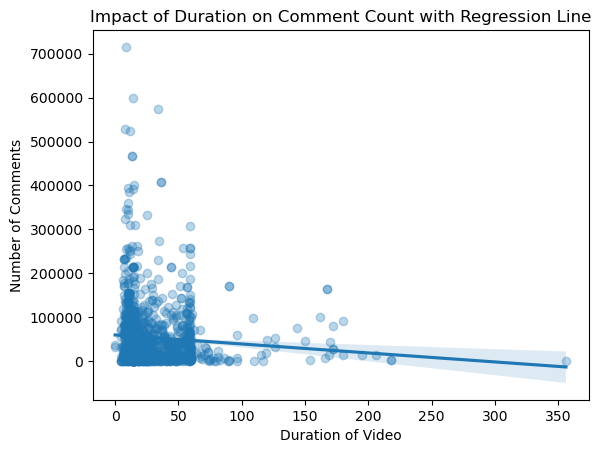

In [21]:
# Scatter plot of Impact of Duration on Comment Count
sns.regplot(x='Duration', y='CommentCount', data=tiktok_data, scatter_kws={'alpha': 0.3})
plt.title('Impact of Duration on Comment Count with Regression Line')
plt.xlabel('Duration of Video')
plt.ylabel('Number of Comments')
plt.show()

# Takeaway
There is enough evidence to say with 95% confidence that longer videos get fewer comments on TikTok. This relationship is not true for verified users, perhaps because followers are willing to watch longer videos.